In [234]:
import pandas as pd 

In [235]:
data = pd.read_csv("./Marseille.csv")

In [236]:
data.head()

,Unnamed: 0,city,name,location,airconditioning,beachfront,breakfast,dishwasher,dryer,elevator,...,price,reviewnumber,link,details_page,amenities_page,reviews,amenities,response_time,response_rate,languages
0,0,Marseille,"Metro Timone, Sunny Apartment, Peaceful Calm R...",Marseille,0,0,0,1,0,1,...,34,67.0,http://airbnb.com/rooms/37954537?check_in=2020...,-1,-1,[''],NaN,Unknown,Unknown,['Unknown']
1,1,Marseille,La petite perle du centre,Marseille,0,0,0,0,0,0,...,43,NaN,http://airbnb.com/rooms/46352149?check_in=2020...,-1,-1,[''],NaN,Unknown,Unknown,['Unknown']
2,2,Marseille,"T2 design,tout confort en plein cœur du vieux ...",Marseille,1,0,0,0,0,0,...,66,324.0,http://airbnb.com/rooms/17612948?check_in=2020...,-1,-1,[''],NaN,Unknown,Unknown,['Unknown']
3,3,Marseille,"Nice terrace, near train station, old port & M...",Marseille,0,0,1,0,0,0,...,43,409.0,http://airbnb.com/rooms/10811286?check_in=2020...,-1,-1,[''],NaN,Unknown,Unknown,['Unknown']
4,4,Marseille,Urbinn Flat★Séjour romantique VieuxPort Jacuzzi★,Marseille,1,0,0,0,0,0,...,117,70.0,http://airbnb.com/rooms/34896094?check_in=2020...,-1,-1,[''],NaN,Unknown,Unknown,['Unknown']


In [237]:
data = data.drop(['link', 'response_rate', 'response_time','reviews','languages'], axis=1)

data.head()

,Unnamed: 0,city,name,location,airconditioning,beachfront,breakfast,dishwasher,dryer,elevator,...,bedrooms,beds,bathrooms,discountedprice,score,price,reviewnumber,details_page,amenities_page,amenities
0,0,Marseille,"Metro Timone, Sunny Apartment, Peaceful Calm R...",Marseille,0,0,0,1,0,1,...,1,1.0,1.5,26.0,4.87,34,67.0,-1,-1,NaN
1,1,Marseille,La petite perle du centre,Marseille,0,0,0,0,0,0,...,Studio,1.0,1,NaN,NaN,43,NaN,-1,-1,NaN
2,2,Marseille,"T2 design,tout confort en plein cœur du vieux ...",Marseille,1,0,0,0,0,0,...,1,1.0,1,56.0,4.49,66,324.0,-1,-1,NaN
3,3,Marseille,"Nice terrace, near train station, old port & M...",Marseille,0,0,1,0,0,0,...,1,1.0,1,NaN,4.77,43,409.0,-1,-1,NaN
4,4,Marseille,Urbinn Flat★Séjour romantique VieuxPort Jacuzzi★,Marseille,1,0,0,0,0,0,...,1,2.0,1,NaN,4.73,117,70.0,-1,-1,NaN


In [238]:
data.count()

Unnamed: 0                    300
city                          300
name                          300
location                      300
airconditioning               300
beachfront                    300
breakfast                     300
dishwasher                    300
dryer                         300
elevator                      300
freecancellationuntildec23    300
freeparking                   300
gym                           300
hottub                        300
in                            300
indoorfireplace               300
kitchen                       300
petsallowed                   300
pool                          300
selfcheck                     300
washer                        300
waterfront                    300
wifi                          300
roomtype                      300
detailed_location             300
guests                        272
bedrooms                      300
beds                          299
bathrooms                     299
discountedpric

In [239]:
data.nunique() 

Unnamed: 0                    300
city                            1
name                          235
location                        7
airconditioning                 2
beachfront                      2
breakfast                       2
dishwasher                      2
dryer                           2
elevator                        2
freecancellationuntildec23      2
freeparking                     2
gym                             2
hottub                          2
in                              2
indoorfireplace                 2
kitchen                         2
petsallowed                     2
pool                            2
selfcheck                       2
washer                          2
waterfront                      2
wifi                            2
roomtype                       14
detailed_location              54
guests                          8
bedrooms                        4
beds                            8
bathrooms                       6
discountedpric

In [240]:
data['location'].nunique()

7

In [241]:
print (data.groupby('location')['roomtype'].nunique())

location
Allauch                1
Gardanne               1
Le Rove                1
Les PennesMirabeau     1
Marseille             14
PlandeCuques           1
SaintVictoret          1
Name: roomtype, dtype: int64


In [242]:
print (data.groupby('roomtype')['location'].nunique())

roomtype
Boat                         1
Entire apartment             1
Entire chalet                1
Entire condominium           1
Entire guesthouse            1
Entire house                 3
Entire loft                  1
Entire serviced apartment    1
Entire townhouse             1
Entire villa                 1
Hotel room                   1
Private room                 5
Room                         1
Shared room                  1
Name: location, dtype: int64


In [243]:
location_data=data.groupby(['location']).agg(['count','nunique'])
location_data['name']

,count,nunique
location,,
Allauch,1,1
Gardanne,1,1
Le Rove,1,1
Les PennesMirabeau,1,1
Marseille,293,229
PlandeCuques,1,1
SaintVictoret,2,1


## percentage of rooms by location

In [244]:
import altair as alt
import pandas as pd

source = pd.DataFrame({'location': ['Allauch', 'Gardanne', 'Le Rove', 'Les PennesMirabeau', 'Marseille','PlandeCuques','SaintVictoret']
                           ,'count': [1,1,1,1,229,1,1]})

alt.Chart(source).transform_joinaggregate(
    Total='sum(count)',
).transform_calculate(
    PercentOfTotal="datum.count / datum.Total"
).mark_bar().encode(
    alt.X('PercentOfTotal:Q', axis=alt.Axis(format='.0%')),
    y='location:N'
)


alt.Chart(...)

In [245]:
location_data=data.groupby(['roomtype']).agg(['count','nunique'])
location_data['name']

,count,nunique
roomtype,,
Boat,2,1
Entire apartment,155,126
Entire chalet,1,1
Entire condominium,20,12
Entire guesthouse,2,2
Entire house,5,4
Entire loft,7,6
Entire serviced apartment,4,4
Entire townhouse,2,1


In [246]:
location_data[['name']]

name        
                          count nunique
roomtype                               
Boat                          2       1
Entire apartment            155     126
Entire chalet                 1       1
Entire condominium           20      12
Entire guesthouse             2       2
Entire house                  5       4
Entire loft                   7       6
Entire serviced apartment     4       4
Entire townhouse              2       1
Entire villa                  2       2
Hotel room                    4       3
Private room                 84      63
Room                          3       3
Shared room                   9       7

In [247]:
data['roomtype'].unique()

array(['Private room', 'Entire apartment', 'Entire villa',
       'Entire condominium', 'Shared room', 'Hotel room',
       'Entire townhouse', 'Entire house', 'Entire loft',
       'Entire serviced apartment', 'Entire chalet', 'Entire guesthouse',
       'Boat', 'Room'], dtype=object)

In [250]:
data['location'].unique()

array(['Marseille', 'Les PennesMirabeau', 'SaintVictoret', 'Gardanne',
       'PlandeCuques', 'Le Rove', 'Allauch'], dtype=object)

## percent of  rooms by its type

In [218]:
import altair as alt
import pandas as pd

source = pd.DataFrame({'roomtype': ['Private room', 'Entire apartment', 'Entire villa',
       'Entire condominium', 'Shared room', 'Hotel room',
       'Entire townhouse', 'Entire house', 'Entire loft',
       'Entire serviced apartment', 'Entire chalet', 'Entire guesthouse',
       'Boat', 'Room']
                           ,'count': [2,155,1,20,2,5,7,4,2,2,4,84,3,9]})

alt.Chart(source).transform_joinaggregate(
    Total='sum(count)',
).transform_calculate(
    PercentOfTotal="datum.count / datum.Total"
).mark_bar().encode(
    alt.X('PercentOfTotal:Q', axis=alt.Axis(format='.0%')),
    y='roomtype:N'
)



alt.Chart(...)

In [219]:
data['price']

0       34
1       43
2       66
3       43
4      117
      ... 
295     93
296     70
297    125
298     70
299     61
Name: price, Length: 300, dtype: int64

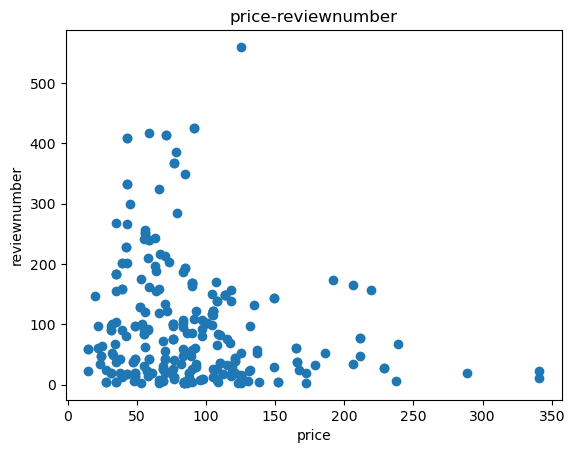

In [220]:
import matplotlib.pyplot as plt

x = data['price']
y = data['reviewnumber']

plt.scatter(x, y)
plt.title("price-reviewnumber")
plt.xlabel("price")
plt.ylabel("reviewnumber")
plt.show()

In [ ]:
x = df_DNK_info['House_Price']
y = df_DNK_info['TIME']
# plot the data itself
pylab.plot(x, y,'o')

 

# calc the trendline
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
pylab.plot(x,p(x),"r--")

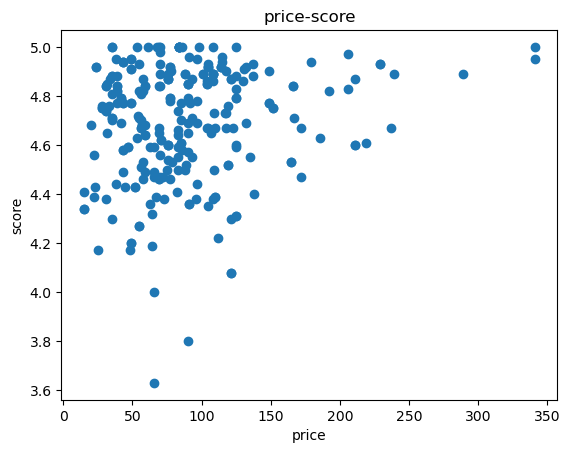

In [224]:
import matplotlib.pyplot as plt

x = data['price']
y = data['score']

plt.scatter(x, y)
plt.title("price-score")
plt.xlabel("price")
plt.ylabel("score")
plt.show()

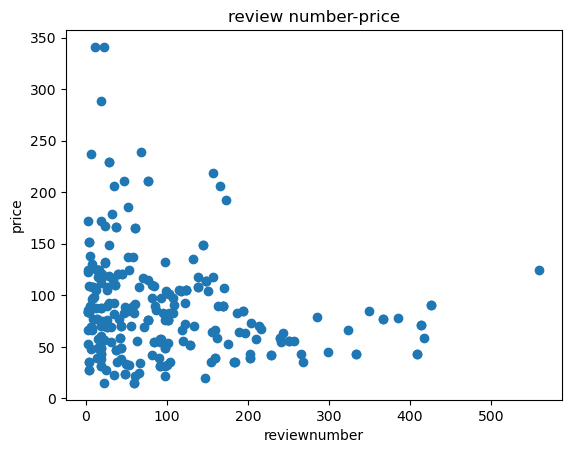

In [248]:
import matplotlib.pyplot as plt

x = data['reviewnumber']
y = data['price']

plt.scatter(x, y)
plt.title("review number-price")
plt.xlabel("reviewnumber")
plt.ylabel("price")
plt.show()

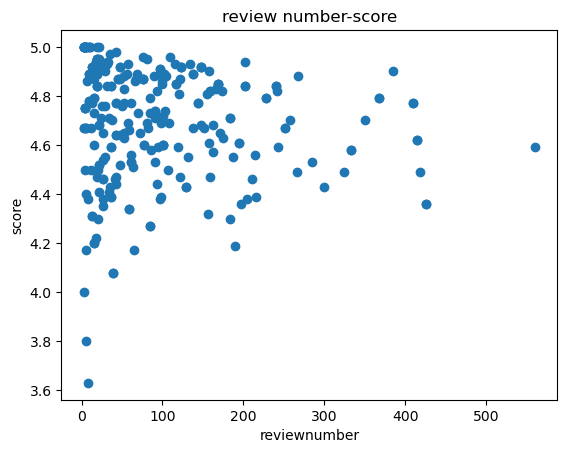

In [249]:
import matplotlib.pyplot as plt

x = data['reviewnumber']
y = data['score']

plt.scatter(x, y)
plt.title("review number-score")
plt.xlabel("reviewnumber")
plt.ylabel("score")
plt.show()

In [192]:
import seaborn as sns
import matplotlib.pyplot as plt
from vega_datasets import data

In [ ]:
import altair as alt
import pandas as pd

source = pd.DataFrame({'location': ['Allauch', 'Gardanne', 'Le Rove', 'Les PennesMirabeau', 'Marseille','PlandeCuques','SaintVictoret']
                           ,'count': [1,1,1,1,229,1,1]})

alt.Chart(source).transform_joinaggregate(
    Total='sum(count)',
).transform_calculate(
    PercentOfTotal="datum.count / datum.Total"
).mark_bar().encode(
    alt.X('PercentOfTotal:Q', axis=alt.Axis(format='.0%')),
    y='location:N'
)

In [67]:
roomtype_data=data.groupby(['roomtype','location']).agg(['count','nunique'])
roomtype_data['name']

count  nunique
roomtype                  location                          
Boat                      Marseille               2        1
Entire apartment          Marseille             155      126
Entire chalet             Marseille               1        1
Entire condominium        Marseille              20       12
Entire guesthouse         Marseille               2        2
Entire house              Le Rove                 1        1
                          Marseille               3        2
                          PlandeCuques            1        1
Entire loft               Marseille               7        6
Entire serviced apartment Marseille               4        4
Entire townhouse          Marseille               2        1
Entire villa              Marseille               2        2
Hotel room                Marseille               4        3
Private room              Allauch                 1        1
                          Gardanne                1        1
                          Les PennesMirabeau      1        1
                          Marseille              79       59
                          SaintVictoret           2        1
Room                      Marseille               3        3
Shared room               Marseille               9        7

In [8]:
unique_location = data['location'].unique()
unique_location

array(['Marseille', 'Les PennesMirabeau', 'SaintVictoret', 'Gardanne',
       'PlandeCuques', 'Le Rove', 'Allauch'], dtype=object)

In [9]:
unique_roomtype = data['roomtype'].unique()
unique_roomtype

array(['Private room', 'Entire apartment', 'Entire villa',
       'Entire condominium', 'Shared room', 'Hotel room',
       'Entire townhouse', 'Entire house', 'Entire loft',
       'Entire serviced apartment', 'Entire chalet', 'Entire guesthouse',
       'Boat', 'Room'], dtype=object)